In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.tree          import DecisionTreeRegressor
from sklearn.ensemble      import RandomForestRegressor
from sklearn.ensemble      import ExtraTreesRegressor
from sklearn.ensemble      import AdaBoostRegressor
from sklearn.ensemble      import GradientBoostingRegressor
from xgboost               import XGBRegressor
from lightgbm              import LGBMRegressor
from catboost              import CatBoostRegressor
sns.set()

In [9]:
data = pd.read_csv('final_data.csv')
data.head(10)

,flight_prices,company_names,dep_city,arrival_city,transfer_stops,duration_of_flight,additional_info,booking_dates,travel_dates,Dep_Time,Arrival_Time
0,24,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,11/10/2022,12/10/2022,13:00,14:25
1,23,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,11/10/2022,13/10/2022,13:00,14:25
2,26,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,11/10/2022,14/10/2022,07:05,08:30
3,23,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,11/10/2022,15/10/2022,21:55,23:20
4,52,Wizz Air,Warsaw,London,non-stop,2h 35m,Economy,11/10/2022,16/10/2022,17:35,19:10
5,52,Wizz Air,Warsaw,London,non-stop,2h 35m,Economy,11/10/2022,17/10/2022,12:10,13:45
6,52,Wizz Air,Warsaw,London,non-stop,2h 35m,Economy,11/10/2022,18/10/2022,06:05,07:40
7,91,LOT,Warsaw,London,non-stop,2h 50m,Economy,11/10/2022,19/10/2022,15:30,17:20
8,91,LOT,Warsaw,London,non-stop,2h 50m,Economy,11/10/2022,12/10/2022,07:35,09:25
9,164,British Airways,Warsaw,London,non-stop,2h 40m,Basic Economy,11/10/2022,13/10/2022,18:10,19:50


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   flight_prices       9131 non-null   int64 
 1   company_names       9131 non-null   object
 2   dep_city            9131 non-null   object
 3   arrival_city        9131 non-null   object
 4   transfer_stops      9131 non-null   object
 5   duration_of_flight  9131 non-null   object
 6   additional_info     8153 non-null   object
 7   booking_dates       9131 non-null   object
 8   travel_dates        9131 non-null   object
 9   Dep_Time            9131 non-null   object
 10  Arrival_Time        9131 non-null   object
dtypes: int64(1), object(10)
memory usage: 784.8+ KB


In [4]:
data.dropna(inplace=True)

In [5]:
data.isnull().sum()

flight_prices         0
company_names         0
dep_city              0
arrival_city          0
transfer_stops        0
duration_of_flight    0
additional_info       0
booking_dates         0
travel_dates          0
Dep_Time              0
Arrival_Time          0
dtype: int64

# EDA

In [6]:
# travel_date is the day when trip will happen
# from this column we can extract day and month of the trip and drop travel_dates column

data['travel_day'] = pd.to_datetime(data.travel_dates, format="%d/%m/%Y").dt.day
data['travel_month'] = pd.to_datetime(data.travel_dates, format="%d/%m/%Y").dt.month
data.drop("travel_dates", axis=1, inplace=True)
data.head()

,flight_prices,company_names,dep_city,arrival_city,transfer_stops,duration_of_flight,additional_info,booking_dates,Dep_Time,Arrival_Time,travel_day,travel_month
0,24,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,11/10/2022,13:00,14:25,12,10
1,23,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,11/10/2022,13:00,14:25,13,10
2,26,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,11/10/2022,07:05,08:30,14,10
3,23,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,11/10/2022,21:55,23:20,15,10
4,52,Wizz Air,Warsaw,London,non-stop,2h 35m,Economy,11/10/2022,17:35,19:10,16,10


In [7]:
# booking_date is the day when trip has booked
# from this column we can extract day and month of the booking day and drop booking_dates column

data['booking_day'] = pd.to_datetime(data.booking_dates, format="%d/%m/%Y").dt.day
data['booking_month'] = pd.to_datetime(data.booking_dates, format="%d/%m/%Y").dt.month
data.drop("booking_dates", axis=1, inplace=True)
data.head()

,flight_prices,company_names,dep_city,arrival_city,transfer_stops,duration_of_flight,additional_info,Dep_Time,Arrival_Time,travel_day,travel_month,booking_day,booking_month
0,24,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,13:00,14:25,12,10,11,10
1,23,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,13:00,14:25,13,10,11,10
2,26,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,07:05,08:30,14,10,11,10
3,23,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,21:55,23:20,15,10,11,10
4,52,Wizz Air,Warsaw,London,non-stop,2h 35m,Economy,17:35,19:10,16,10,11,10


In [8]:
# dep_time is when a plane leaves the gate 
#  Similar with travel_dates we can extract values from dep_time

data['dep_hour'] = pd.to_datetime(data.Dep_Time).dt.hour
data['dep_minute'] = pd.to_datetime(data.Dep_Time).dt.minute
data.drop("Dep_Time", axis=1, inplace=True)
data.head()

,flight_prices,company_names,dep_city,arrival_city,transfer_stops,duration_of_flight,additional_info,Arrival_Time,travel_day,travel_month,booking_day,booking_month,dep_hour,dep_minute
0,24,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,14:25,12,10,11,10,13,0
1,23,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,14:25,13,10,11,10,13,0
2,26,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,08:30,14,10,11,10,7,5
3,23,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,23:20,15,10,11,10,21,55
4,52,Wizz Air,Warsaw,London,non-stop,2h 35m,Economy,19:10,16,10,11,10,17,35


In [9]:
# arrival_time is when the plane pulls up to the gate. 
#  Similar with travel_dates we can extract values from arrival_time

data['arrival_hour'] = pd.to_datetime(data.Arrival_Time).dt.hour
data['arrival_minute'] = pd.to_datetime(data.Arrival_Time).dt.minute
data.drop("Arrival_Time", axis=1, inplace=True)
data.head()

,flight_prices,company_names,dep_city,arrival_city,transfer_stops,duration_of_flight,additional_info,travel_day,travel_month,booking_day,booking_month,dep_hour,dep_minute,arrival_hour,arrival_minute
0,24,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,12,10,11,10,13,0,14,25
1,23,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,13,10,11,10,13,0,14,25
2,26,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,14,10,11,10,7,5,8,30
3,23,Ryanair,Warsaw,London,non-stop,2h 25m,Standard,15,10,11,10,21,55,23,20
4,52,Wizz Air,Warsaw,London,non-stop,2h 35m,Economy,16,10,11,10,17,35,19,10


In [10]:
# Time taken by plane to reach destination is called duration_of flight

duration = list(data['duration_of_flight'])


for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + '0m '  # add  0 minute
        else:
            duration[i] = ' 0h' + duration[i]  # ad 0 hours

duration_hours = []
duration_minute = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0])) # extract hours from duration
    duration_minute.append(int(duration[i].split(sep = 'm')[0].split()[-1])) # extract only minutes from duration


In [11]:
data['duration_hours'] = duration_hours
data['duration_minute'] = duration_minute
data.drop(['duration_of_flight'], axis=1, inplace=True)
data.head()

,flight_prices,company_names,dep_city,arrival_city,transfer_stops,additional_info,travel_day,travel_month,booking_day,booking_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minute
0,24,Ryanair,Warsaw,London,non-stop,Standard,12,10,11,10,13,0,14,25,2,25
1,23,Ryanair,Warsaw,London,non-stop,Standard,13,10,11,10,13,0,14,25,2,25
2,26,Ryanair,Warsaw,London,non-stop,Standard,14,10,11,10,7,5,8,30,2,25
3,23,Ryanair,Warsaw,London,non-stop,Standard,15,10,11,10,21,55,23,20,2,25
4,52,Wizz Air,Warsaw,London,non-stop,Economy,16,10,11,10,17,35,19,10,2,35


# Handling Categorical Data

In [12]:
company_name = list(data['company_names'])
company_names = []
for i in range(len(company_name)):
    if len(company_name[i].split(','))%2 == 0:
        company_names.append('Multiple_Airlines')
    else:
        company_names.append(company_name[i])    
print(company_names[:20])        
        
    

['Ryanair', 'Ryanair', 'Ryanair', 'Ryanair', 'Wizz Air', 'Wizz Air', 'Wizz Air', 'LOT', 'LOT', 'British Airways', 'Multiple_Airlines', 'Multiple_Airlines', 'LOT', 'Multiple_Airlines', 'LOT', 'Multiple_Airlines', 'Ryanair', 'Ryanair', 'Ryanair', 'Ryanair']


In [13]:
data.drop(['company_names'], axis=1, inplace=True)

In [14]:
data['airline_names'] = company_names
data.head()

,flight_prices,dep_city,arrival_city,transfer_stops,additional_info,travel_day,travel_month,booking_day,booking_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minute,airline_names
0,24,Warsaw,London,non-stop,Standard,12,10,11,10,13,0,14,25,2,25,Ryanair
1,23,Warsaw,London,non-stop,Standard,13,10,11,10,13,0,14,25,2,25,Ryanair
2,26,Warsaw,London,non-stop,Standard,14,10,11,10,7,5,8,30,2,25,Ryanair
3,23,Warsaw,London,non-stop,Standard,15,10,11,10,21,55,23,20,2,25,Ryanair
4,52,Warsaw,London,non-stop,Economy,16,10,11,10,17,35,19,10,2,35,Wizz Air


In [15]:
data['airline_names'].value_counts()

Multiple_Airlines    1624
Ryanair              1030
Lufthansa             913
easyJet               865
Vueling               683
KLM                   381
LOT                   361
British Airways       355
Iberia                333
Norwegian             320
SWISS                 228
Austrian Airlines     189
Wizz Air              177
Eurowings             151
Air France            149
ITA Airways           127
Finnair               113
Transavia France       76
Multiple Airlines      29
Smartwings             24
Air Europa             20
TAP AIR PORTUGAL        3
Volotea                 2
Name: airline_names, dtype: int64

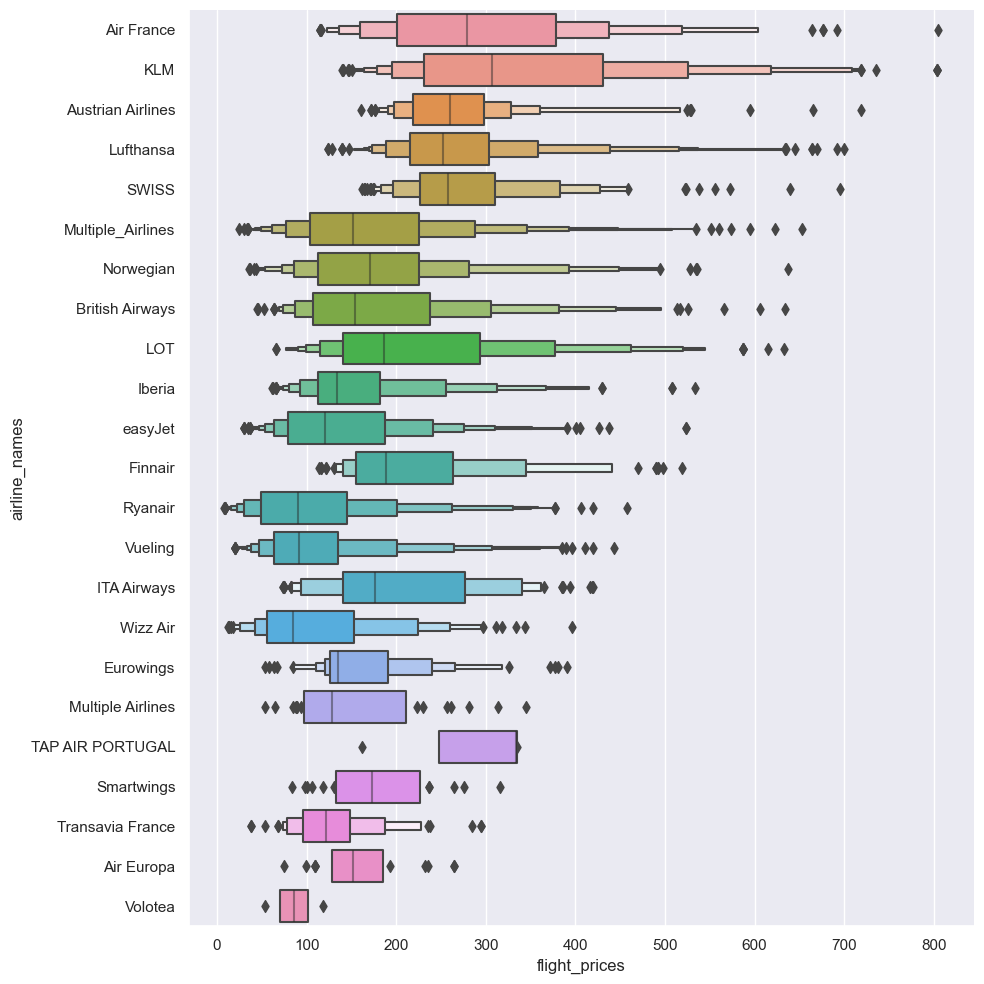

In [16]:
# from the graph we see that KLM have the highest price. 

# Company name vs Price

sns.catplot(x = 'flight_prices', y = 'airline_names', data=data.sort_values("flight_prices", ascending=False), kind='boxen', height = 10, aspect = 1)
plt.savefig('airlinevsprice')
plt.show()

In [17]:
# As Airline names is Nominal Categorical data we will use One-Hot-Encoding

Airline = data[['airline_names']]

Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,airline_names_Air France,airline_names_Austrian Airlines,airline_names_British Airways,airline_names_Eurowings,airline_names_Finnair,airline_names_ITA Airways,airline_names_Iberia,airline_names_KLM,airline_names_LOT,airline_names_Lufthansa,...,airline_names_Norwegian,airline_names_Ryanair,airline_names_SWISS,airline_names_Smartwings,airline_names_TAP AIR PORTUGAL,airline_names_Transavia France,airline_names_Volotea,airline_names_Vueling,airline_names_Wizz Air,airline_names_easyJet
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
# dep_city is city from where plane will take off

data['dep_city'].value_counts()

Barcelona    987
London       956
Prague       945
Rome         931
Paris        918
Warsaw       902
Berlin       885
Amsterdam    853
Oslo         776
Name: dep_city, dtype: int64

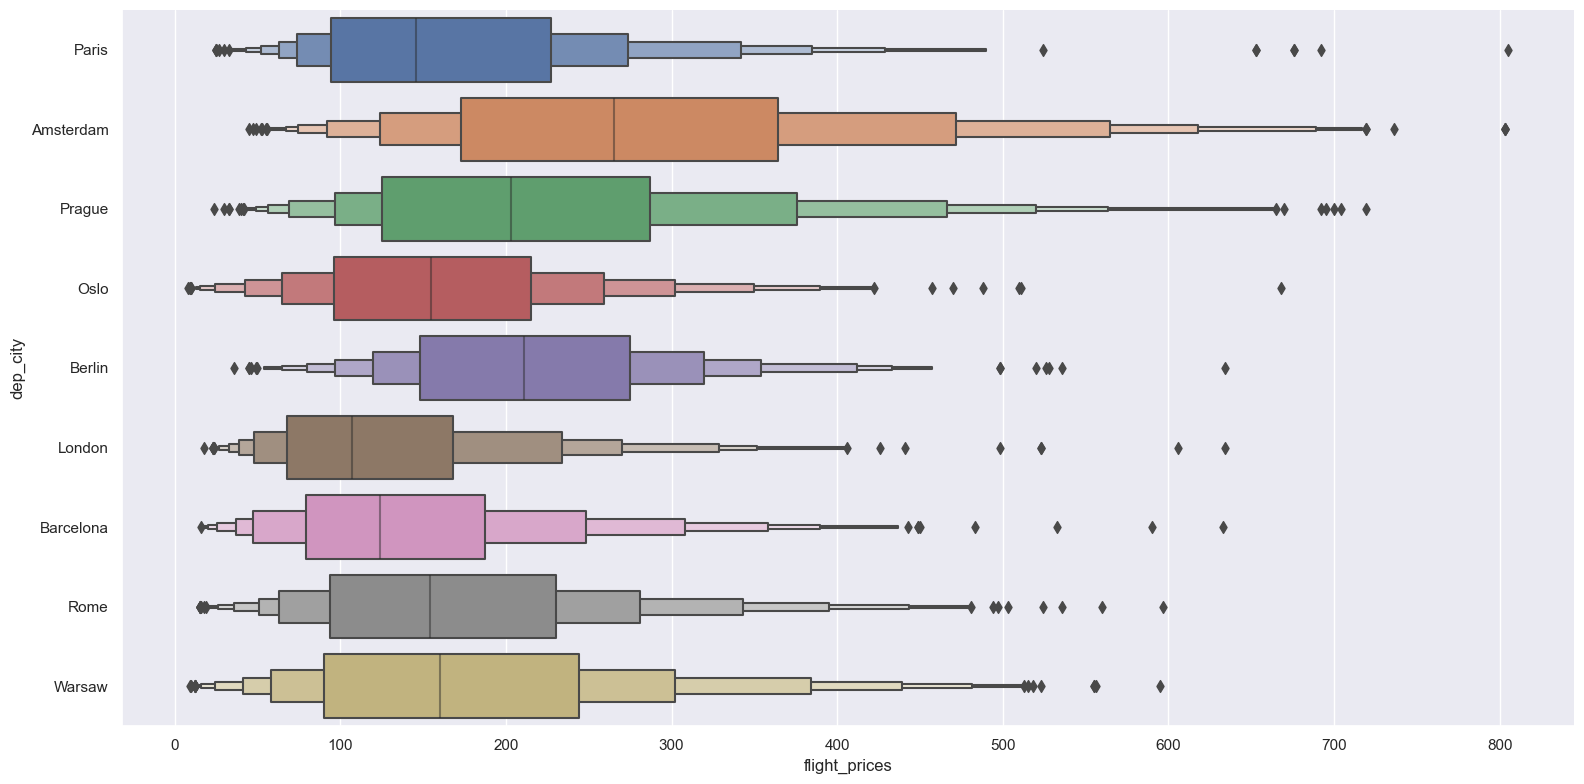

In [19]:
# according to the graph we can see that all cities have almost similar mean
# Departure City vs Price

sns.catplot(x = 'flight_prices', y = 'dep_city', data=data.sort_values('flight_prices', ascending=False), kind='boxen', height=8, aspect = 2)
plt.savefig('dep_cityvsprice')
plt.show()

In [20]:
# As Departure city Categorical data I will use One-Hot-Encoding

Source = data[['dep_city']]

Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,dep_city_Barcelona,dep_city_Berlin,dep_city_London,dep_city_Oslo,dep_city_Paris,dep_city_Prague,dep_city_Rome,dep_city_Warsaw
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


In [21]:
# I will appply same technic with arrival_city feature

data['arrival_city'].value_counts()

Barcelona    996
Rome         973
London       950
Paris        935
Warsaw       921
Prague       906
Berlin       880
Amsterdam    841
Oslo         751
Name: arrival_city, dtype: int64

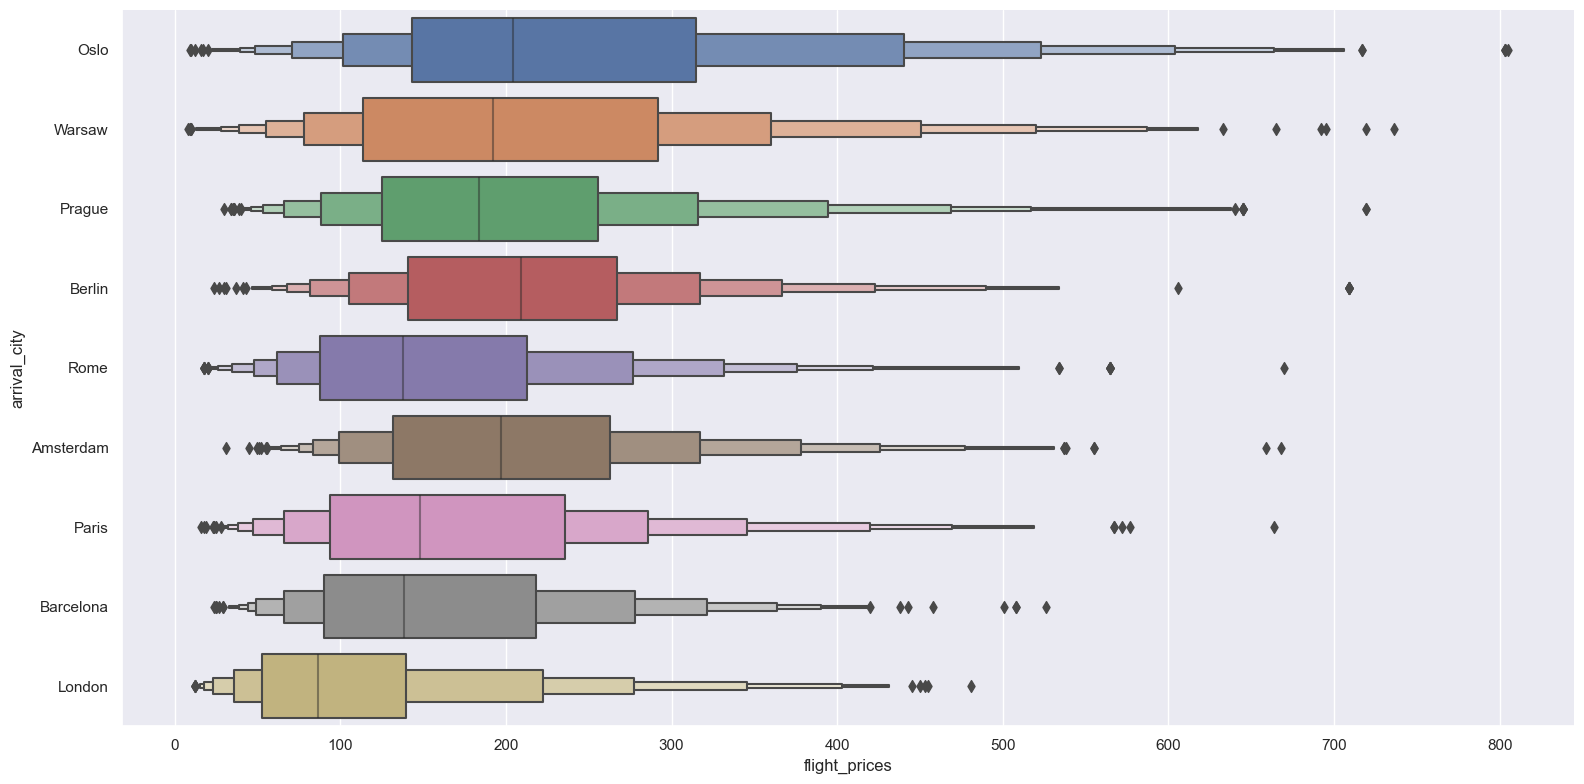

In [22]:
# according to the graph we can see that all cities have almost similar mean
# Arrival City vs Price

sns.catplot(x = 'flight_prices', y = 'arrival_city', data=data.sort_values('flight_prices', ascending=False), kind='boxen', height=8, aspect = 2)
plt.savefig('arrivalcity_price')
plt.show()

In [23]:
Destination = data[['arrival_city']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,arrival_city_Barcelona,arrival_city_Berlin,arrival_city_London,arrival_city_Oslo,arrival_city_Paris,arrival_city_Prague,arrival_city_Rome,arrival_city_Warsaw
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [24]:
# transfer_stops are how many stops occur durin the flight

data['transfer_stops'].value_counts()

1 stop      4217
non-stop    3731
2 stops      198
3 stops        7
Name: transfer_stops, dtype: int64

In [25]:
# As this is the Ordinal Categorical type i will perform LabelEncoder

data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3}, inplace=True)

In [26]:
data['Stops'] = data['transfer_stops']

In [27]:
data.drop('transfer_stops', axis=1, inplace=True)

In [28]:
data['additional_info'].value_counts()

Standard                  2657
Economy                   2347
Economy Light             1181
Light                      518
Basic                      497
LowFare                    413
Basic Economy              255
Standard Economy            59
Economy Classic             51
Plus                        46
Flexible                    39
Flex                        29
Economy Campaign Saver      16
Business Flex               15
Saver                       11
Business                     6
Discount                     3
Smart                        3
Business Promotional         2
Comfort                      2
Economy Fully Flex           1
Business Fully Flex          1
Business Saver               1
Name: additional_info, dtype: int64

In [29]:
data.drop(['additional_info'], axis=1, inplace=True)

In [30]:
data.head()

,flight_prices,dep_city,arrival_city,travel_day,travel_month,booking_day,booking_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minute,airline_names,Stops
0,24,Warsaw,London,12,10,11,10,13,0,14,25,2,25,Ryanair,0
1,23,Warsaw,London,13,10,11,10,13,0,14,25,2,25,Ryanair,0
2,26,Warsaw,London,14,10,11,10,7,5,8,30,2,25,Ryanair,0
3,23,Warsaw,London,15,10,11,10,21,55,23,20,2,25,Ryanair,0
4,52,Warsaw,London,16,10,11,10,17,35,19,10,2,35,Wizz Air,0


In [31]:
# Now I will concatenate all dataframes --> data + Airline + Source + Destination

df = pd.concat([data, Airline, Source, Destination], axis=1)
df.head()

,flight_prices,dep_city,arrival_city,travel_day,travel_month,booking_day,booking_month,dep_hour,dep_minute,arrival_hour,...,dep_city_Rome,dep_city_Warsaw,arrival_city_Barcelona,arrival_city_Berlin,arrival_city_London,arrival_city_Oslo,arrival_city_Paris,arrival_city_Prague,arrival_city_Rome,arrival_city_Warsaw
0,24,Warsaw,London,12,10,11,10,13,0,14,...,0,1,0,0,1,0,0,0,0,0
1,23,Warsaw,London,13,10,11,10,13,0,14,...,0,1,0,0,1,0,0,0,0,0
2,26,Warsaw,London,14,10,11,10,7,5,8,...,0,1,0,0,1,0,0,0,0,0
3,23,Warsaw,London,15,10,11,10,21,55,23,...,0,1,0,0,1,0,0,0,0,0
4,52,Warsaw,London,16,10,11,10,17,35,19,...,0,1,0,0,1,0,0,0,0,0


In [32]:
df.drop(['dep_city', 'arrival_city', 'airline_names'], axis=1, inplace = True)

In [33]:
df.head()

,flight_prices,travel_day,travel_month,booking_day,booking_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,...,dep_city_Rome,dep_city_Warsaw,arrival_city_Barcelona,arrival_city_Berlin,arrival_city_London,arrival_city_Oslo,arrival_city_Paris,arrival_city_Prague,arrival_city_Rome,arrival_city_Warsaw
0,24,12,10,11,10,13,0,14,25,2,...,0,1,0,0,1,0,0,0,0,0
1,23,13,10,11,10,13,0,14,25,2,...,0,1,0,0,1,0,0,0,0,0
2,26,14,10,11,10,7,5,8,30,2,...,0,1,0,0,1,0,0,0,0,0
3,23,15,10,11,10,21,55,23,20,2,...,0,1,0,0,1,0,0,0,0,0
4,52,16,10,11,10,17,35,19,10,2,...,0,1,0,0,1,0,0,0,0,0


In [57]:
df.shape

(8153, 50)

# Feature Selection

In [35]:
df.columns

Index(['flight_prices', 'travel_day', 'travel_month', 'booking_day',
       'booking_month', 'dep_hour', 'dep_minute', 'arrival_hour',
       'arrival_minute', 'duration_hours', 'duration_minute', 'Stops',
       'airline_names_Air France', 'airline_names_Austrian Airlines',
       'airline_names_British Airways', 'airline_names_Eurowings',
       'airline_names_Finnair', 'airline_names_ITA Airways',
       'airline_names_Iberia', 'airline_names_KLM', 'airline_names_LOT',
       'airline_names_Lufthansa', 'airline_names_Multiple Airlines',
       'airline_names_Multiple_Airlines', 'airline_names_Norwegian',
       'airline_names_Ryanair', 'airline_names_SWISS',
       'airline_names_Smartwings', 'airline_names_TAP AIR PORTUGAL',
       'airline_names_Transavia France', 'airline_names_Volotea',
       'airline_names_Vueling', 'airline_names_Wizz Air',
       'airline_names_easyJet', 'dep_city_Barcelona', 'dep_city_Berlin',
       'dep_city_London', 'dep_city_Oslo', 'dep_city_Paris', 'de

In [36]:
X = df.loc[:, ['Stops', 'travel_day', 'travel_month', 'booking_day', 'booking_month',
       'dep_hour', 'dep_minute', 'arrival_hour', 'arrival_minute',
       'duration_hours', 'duration_minute', 'airline_names_Air France',
       'airline_names_Austrian Airlines', 'airline_names_British Airways',
       'airline_names_Eurowings', 'airline_names_Finnair',
       'airline_names_ITA Airways', 'airline_names_Iberia',
       'airline_names_KLM', 'airline_names_LOT', 'airline_names_Lufthansa',
       'airline_names_Multiple Airlines',
       'airline_names_Norwegian', 'airline_names_Ryanair',
       'airline_names_SWISS', 'airline_names_Smartwings',
       'airline_names_TAP AIR PORTUGAL', 'airline_names_Transavia France',
       'airline_names_Vueling',
       'airline_names_Wizz Air', 'airline_names_easyJet', 'dep_city_Barcelona',
       'dep_city_Berlin', 'dep_city_London', 'dep_city_Oslo', 'dep_city_Paris',
       'dep_city_Prague', 'dep_city_Rome', 'dep_city_Warsaw',
       'arrival_city_Barcelona', 'arrival_city_Berlin', 'arrival_city_London',
       'arrival_city_Oslo', 'arrival_city_Paris', 'arrival_city_Prague',
       'arrival_city_Rome', 'arrival_city_Warsaw']]

X.head()       

,Stops,travel_day,travel_month,booking_day,booking_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,...,dep_city_Rome,dep_city_Warsaw,arrival_city_Barcelona,arrival_city_Berlin,arrival_city_London,arrival_city_Oslo,arrival_city_Paris,arrival_city_Prague,arrival_city_Rome,arrival_city_Warsaw
0,0,12,10,11,10,13,0,14,25,2,...,0,1,0,0,1,0,0,0,0,0
1,0,13,10,11,10,13,0,14,25,2,...,0,1,0,0,1,0,0,0,0,0
2,0,14,10,11,10,7,5,8,30,2,...,0,1,0,0,1,0,0,0,0,0
3,0,15,10,11,10,21,55,23,20,2,...,0,1,0,0,1,0,0,0,0,0
4,0,16,10,11,10,17,35,19,10,2,...,0,1,0,0,1,0,0,0,0,0


C:\Users\islom\AppData\Local\Temp\ipykernel_9868\356367757.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


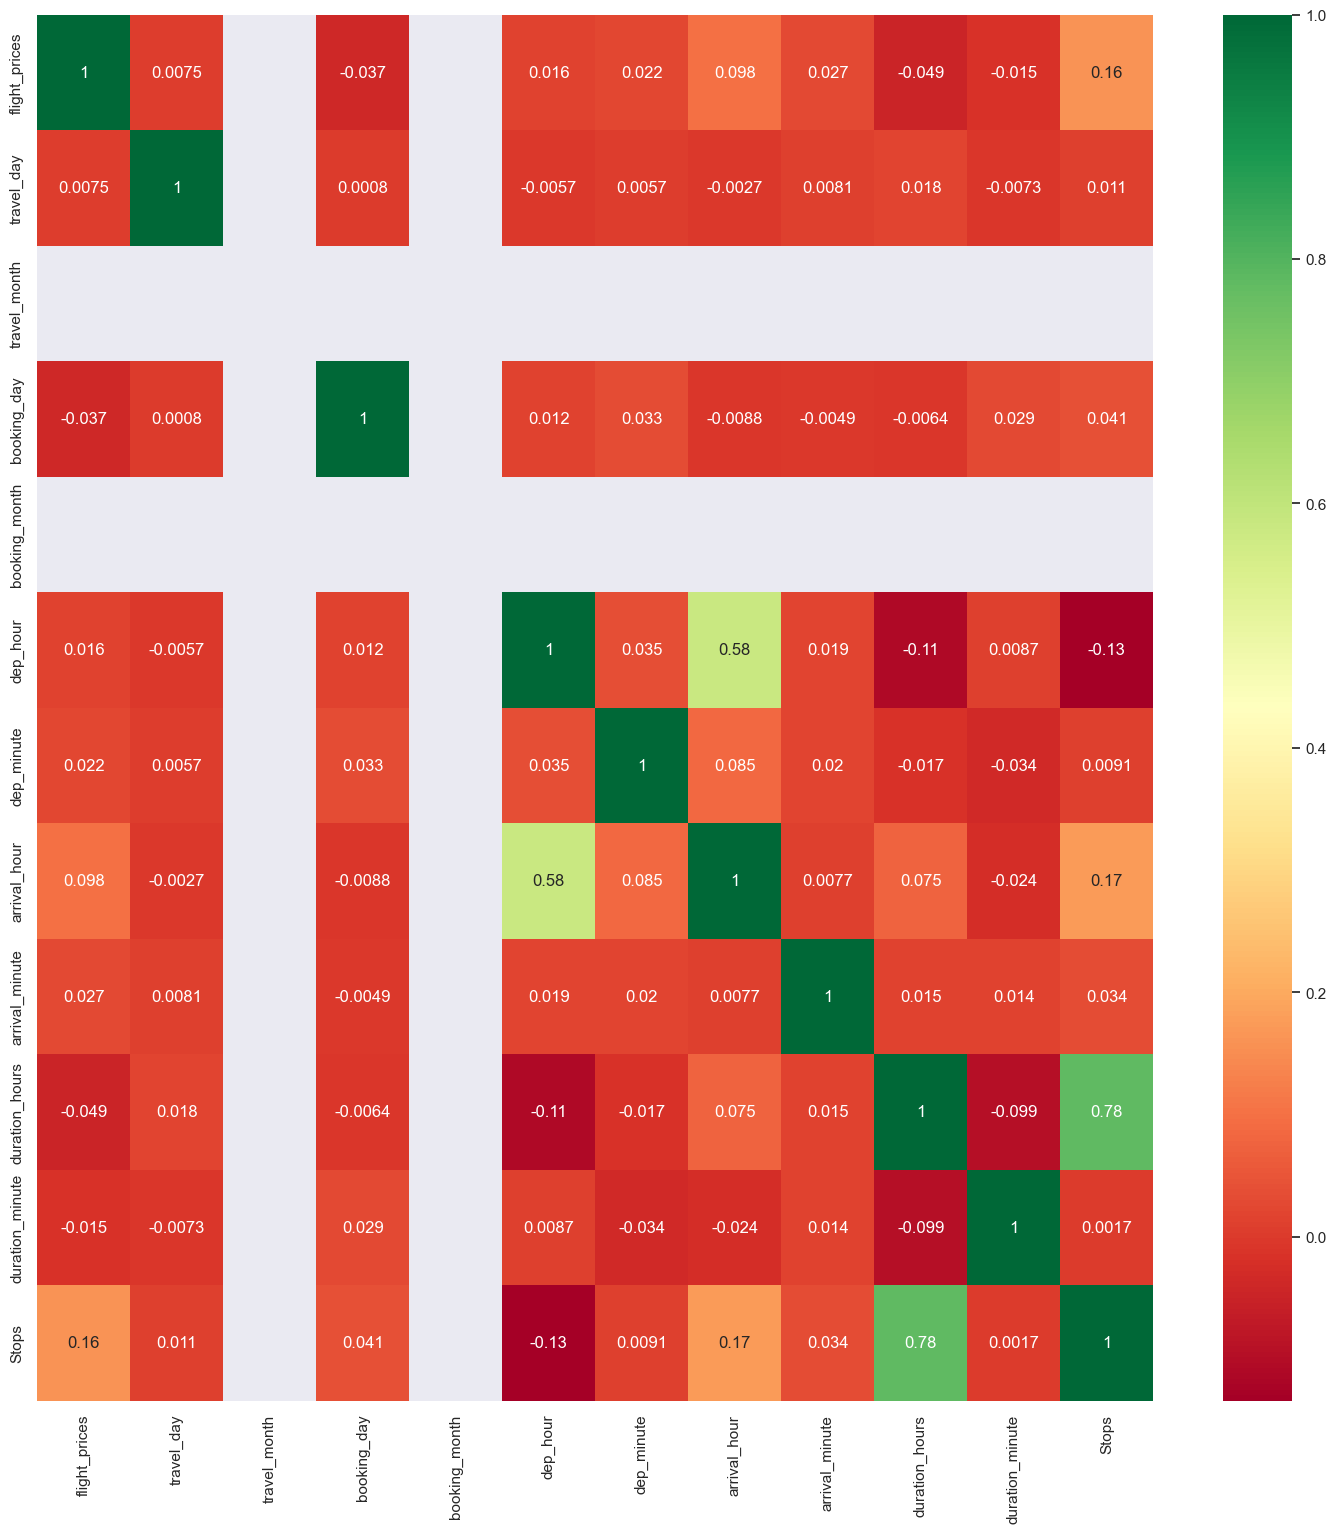

In [37]:
# Finds correlation between Independent and Dependent attributes
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [38]:
y = df['flight_prices']

In [39]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [40]:
print(selection.feature_importances_)

[0.03780356 0.1040117  0.         0.02381965 0.         0.03985333
 0.04010773 0.03898066 0.04108264 0.05143528 0.03369813 0.02500704
 0.01121364 0.00763385 0.00292106 0.00245236 0.00358626 0.00315496
 0.10378735 0.02084675 0.08942974 0.00041207 0.00356103 0.03629805
 0.01618604 0.00024658 0.00024819 0.00026051 0.0209836  0.00476325
 0.00602583 0.01281528 0.01274953 0.02250715 0.00826958 0.0088623
 0.01882266 0.00494894 0.01177757 0.01124397 0.0159059  0.02588959
 0.03415126 0.00797574 0.00959205 0.00698017 0.0176975 ]


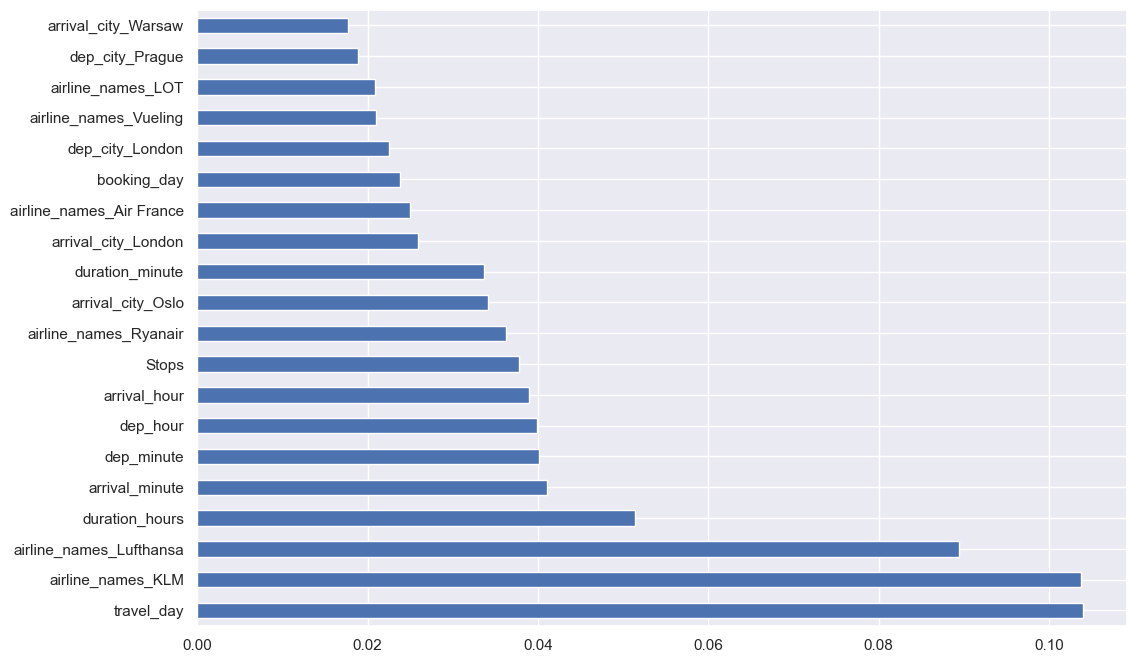

In [41]:
# plotting features importances 

plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.savefig('feature_importance')
plt.show()

# Fitting Model

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [115]:
X_train.shape

(6522, 47)

In [116]:
reg_rf = RandomForestRegressor()

In [117]:
reg_rf.fit(X_train, y_train)


RandomForestRegressor()

In [118]:
y_pred1  = reg_rf.predict(X_test)

In [119]:
print(reg_rf.score(X_train, y_train))


0.9149332514025208


In [51]:

reg_lgbm = LGBMRegressor(n_estimators=100)


In [52]:
reg_lgbm.fit(X_train, y_train)


LGBMRegressor()

In [53]:
y_pred2  = reg_lgbm.predict(X_test)


In [54]:

print(reg_lgbm.score(X_train, y_train))

0.6875175494756156


In [ ]:
import joblib
joblib.dump(reg_lgbm, 'f_model.sav')

['f_model.sav']

In [ ]:
load_model = joblib.load('f_model.sav')

In [ ]:
result = load_model.score(X_test, y_test)
result

0.5751339198722925

In [ ]:
print(mean_absolute_error(y_test, y_pred2))

55.152550198780474


In [123]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
trans = StandardScaler()
model = XGBRegressor()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])


In [125]:
pipeline.fit(X_train, y_train)
y_pred1  = pipeline.predict(X_test)
print(pipeline.score(X_train, y_train))


0.8219875571974309
